# Filtro da Mediana e Média Geométrica

In [1]:
# imports
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

## Carregando a imagem e convertendo para cinza

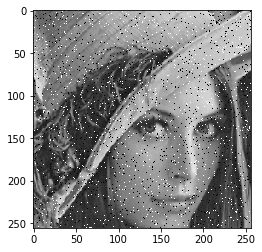

In [2]:
image = mpimg.imread('salt_and_pepper.png')
plt.imshow(image)

## Transformar a imagem em uma escala de cinza

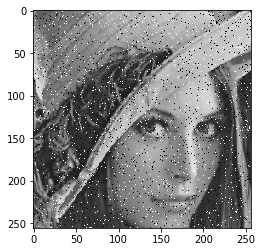

In [3]:
def to_gray(image):
    r, g, b = image[:,:,0], image[:,:,1], image[:,:,2]
    gray_image = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray_image

gray_img = to_gray(image)
plt.imshow(gray_img, "gray")

## Criando padding

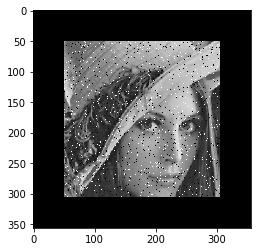

In [4]:
def padding(image, radius=1):
    new_image = np.zeros((len(image) + 2 * radius, len(image[0]) + 2 * radius))
    new_image[radius : -radius, radius : -radius] = image
    return new_image

# exemplo
padding_img = padding(gray_img, radius=50)
plt.imshow(padding_img, "gray")

## Removendo Padding

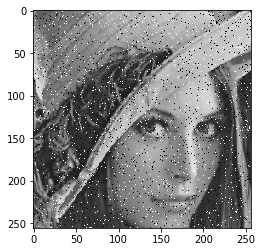

In [5]:
def remove_padding(image, radius=1):
    return image[radius : -radius, radius : -radius].copy()

# exemplo
imagem_original = remove_padding(padding_img, radius=50)
plt.imshow(imagem_original, "gray")

## Definindo e Utilizando o Filtro da Mediana

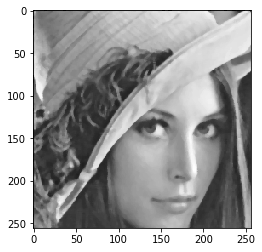

In [24]:
def median(image, radius=1):
    pad_image = padding(image, radius=radius)
    new_image = image.copy()
    for i in range(len(image)):
        for j in range(len(image[0])):
            new_image[i,j] = np.median(pad_image[i:i+2*radius,j:j+2*radius])
    return new_image

# exemplo
filtered_img = median(gray_img, radius=2)
plt.imshow(filtered_img, "gray")

## Definindo e Utilizando Filtro da Média Geométrica

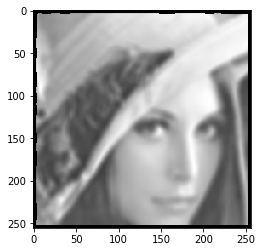

In [23]:
def geometric_mean(image, radius=1):
    pad_image = padding(image, radius=radius)
    new_image = image.copy()
    for i in range(len(image)):
        for j in range(len(image[0])):
            new_image[i,j] = np.power(np.prod(pad_image[i:i+2*radius,j:j+2*radius]), 1/((2*radius+1)**2))
    return new_image

# exemplo
filtered_img = geometric_mean(filtered_img, radius=1)
plt.imshow(filtered_img, "gray")